In [30]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from sklearn.cross_validation import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


/Users/user/Desktop/IWF-DNN/data2DComplex


# Train / validation/ test dataset

In [40]:
DateLocation='MIMO50000_3.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.1)

In [32]:
DateLocation='MIMO5000_3.mat'
DataTest10000 = sio.loadmat(DateLocation)#load data
Xtest=DataTest10000['X']
Xtest = np.transpose(Xtest)
Ytest=DataTest10000['Y']
Ytest = np.transpose(Ytest)
Xtest = np.column_stack((np.real(Xtest), np.imag(Xtest)))
Ytest = np.column_stack((np.real(Ytest), np.imag(Ytest)))

In [72]:
from sklearn.preprocessing import scale
x_train_standard = scale(x_train)
x_val_standard = scale(x_val)  
x_test_standard = scale(Xtest)  
# Don't cheat - fit only on training data
# scaler.fit(x_train,axis=1)  
# x_train_standard = scaler.transform(x_train)  
# x_val_standard = scaler.transform(x_val)  

In [79]:
from sklearn.preprocessing import scale
x_train_standard2 = scale(x_train, axis=1)
x_val_standard2 = scale(x_val,axis=1)  
x_test_standard2 = scale(Xtest,axis=1)

In [80]:
from pandas import DataFrame
tttpr=DataFrame(x_train_standard2)
tttpr.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,...,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000
mean,0.007036,-0.003057,0.002194,0.006268,-0.001374,-0.005329,-0.013691,-0.012797,0.006893,0.001167,...,-0.010612,0.006322,0.002482,-0.004177,0.007264,0.003076,0.002972,-0.001837,-0.001365,-0.004574
std,1.001037,1.001945,0.997671,1.004255,0.999910,1.000972,0.997499,0.999783,0.999091,0.999357,...,1.001873,0.992424,0.999916,0.997181,1.002412,1.006514,1.001481,0.994591,0.998881,0.998396
min,-3.563395,-3.473259,-3.920019,-3.477390,-3.444909,-3.624866,-3.439997,-3.619988,-3.524952,-3.641526,...,-3.467198,-3.503596,-3.645981,-3.601328,-3.485998,-3.417297,-3.478163,-3.501891,-3.672654,-3.487392
25%,-0.684973,-0.702489,-0.690008,-0.694777,-0.695832,-0.699946,-0.697578,-0.713810,-0.687085,-0.694627,...,-0.700801,-0.685603,-0.690742,-0.693632,-0.687508,-0.697460,-0.686465,-0.695275,-0.688369,-0.689528
50%,0.009018,-0.004734,-0.002965,0.003892,0.002956,-0.011155,-0.011951,-0.013733,0.009187,0.000206,...,-0.011201,0.005431,-0.000952,-0.004269,0.005827,0.006959,0.005113,0.005616,-0.003717,-0.006645
75%,0.703595,0.691942,0.697554,0.711728,0.691716,0.695872,0.668273,0.679928,0.699162,0.697900,...,0.683976,0.688624,0.699685,0.678788,0.703535,0.700821,0.695124,0.693583,0.693182,0.694417
max,3.434432,3.536208,3.487824,3.888096,3.890805,3.461232,3.466925,3.455799,3.632317,3.528290,...,3.944875,3.391930,3.540632,3.593600,3.967863,3.509635,3.545450,3.721903,4.015882,3.579098


In [71]:
from pandas import DataFrame
tttpr=DataFrame(x_train_standard)
tttpr.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,...,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04,3.500000e+04
mean,4.060244e-18,-1.725604e-17,-1.766206e-17,-5.988860e-17,-1.461688e-17,1.979369e-17,-1.157170e-17,8.607718e-17,-7.592657e-17,-1.218073e-18,...,5.907655e-17,-4.182052e-17,-1.786507e-17,1.542893e-17,5.156510e-17,1.857562e-17,-1.725604e-17,-4.872293e-18,1.197772e-17,9.846092e-18
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-3.884398e+00,-3.960421e+00,-4.248749e+00,-4.145543e+00,-4.254462e+00,-4.245852e+00,-4.343398e+00,-3.763399e+00,-4.290987e+00,-4.002048e+00,...,-3.900227e+00,-4.004402e+00,-4.708287e+00,-4.435007e+00,-3.789418e+00,-4.279188e+00,-3.910277e+00,-5.076027e+00,-4.081283e+00,-3.770556e+00
25%,-6.716652e-01,-6.749231e-01,-6.711565e-01,-6.713882e-01,-6.764093e-01,-6.729730e-01,-6.599620e-01,-6.789284e-01,-6.719129e-01,-6.762614e-01,...,-6.734175e-01,-6.762413e-01,-6.737209e-01,-6.738109e-01,-6.822666e-01,-6.770608e-01,-6.749286e-01,-6.806651e-01,-6.715786e-01,-6.695217e-01
50%,-2.709329e-04,-3.716642e-03,-1.065928e-03,-2.131108e-03,6.331852e-04,8.837189e-04,1.711506e-03,1.833325e-03,-1.695419e-03,-2.491509e-03,...,-1.531452e-03,2.404440e-04,1.991910e-04,3.483791e-03,3.508829e-03,4.899084e-03,7.403458e-03,7.728642e-03,-1.028637e-02,-1.191253e-03
75%,6.712207e-01,6.743735e-01,6.716202e-01,6.840064e-01,6.723476e-01,6.750486e-01,6.654816e-01,6.775881e-01,6.766069e-01,6.800126e-01,...,6.744889e-01,6.716917e-01,6.743381e-01,6.725829e-01,6.771721e-01,6.779372e-01,6.716237e-01,6.809329e-01,6.790263e-01,6.758182e-01
max,4.260189e+00,4.571295e+00,3.857350e+00,4.011761e+00,4.187243e+00,4.092306e+00,4.000529e+00,3.831279e+00,4.485221e+00,4.050982e+00,...,3.830153e+00,4.418700e+00,4.308969e+00,3.839541e+00,4.630618e+00,3.918741e+00,4.219075e+00,3.984072e+00,4.112895e+00,4.324476e+00


In [9]:
# define base model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(200, input_dim=24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(24, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


KeyboardInterrupt: 

In [36]:
def plot_whole(dict_data):
    fig_1 = plt.figure(figsize=(12,4))
    ax_1 = fig_1.add_subplot(1,2,1)
    ax_2 = fig_1.add_subplot(1,2,2)
    k =int(0)
    for data in dict_data.values():
        ax_1.plot(np.arange(0,len(data['loss'])),data['loss'], label=list(dict_data.keys())[k])
        ax_2.plot(np.arange(0,len(data['val_loss'])),data['val_loss'], label=list(dict_data.keys())[k])
        k += 1
    ax_1.legend(loc=0)
    
    ax_2.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('error(train)')
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('error(valid)')
    fig_1.savefig('err.pdf')
    return fig_1, ax_1, ax_2


In [37]:
dictData={}

In [41]:
x_train.shape

(45000, 24)

In [8]:
y_train.shape

(35000, 12)

In [43]:
# example of training a final regression model

from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model480240 = Sequential()
# activation=keras.layers.ReLU()
model480240.add(Dense(480, input_dim=24, activation='relu'))
model480240.add(Dense(240, activation='relu'))
model480240.add(Dense(120, activation='relu'))
model480240.add(Dense(24, activation='linear'))
model480240.summary()
model480240.compile(loss='mse', optimizer='adam')
hist=model480240.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-480-240-120-Relu-adam']=hist.history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 480)               12000     
_________________________________________________________________
dense_15 (Dense)             (None, 240)               115440    
_________________________________________________________________
dense_16 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_17 (Dense)             (None, 24)                2904      
Total params: 159,264
Trainable params: 159,264
Non-trainable params: 0
_________________________________________________________________
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 7s 145us/step - loss: 0.7827 - val_loss: 0.5445
Epoch 2/100
45000/45000 [==============================] - 6s 138us/step - loss: 0.4812 - val_loss: 0.4564
Epoch

In [16]:
D=12
M=2
N=2
K=3
trainPred=model240.predict(x_train)
nnSRTrain=obj_sum_rate(x_train, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(x_train, y_train,M,N,K, 35000)

/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log2
  del sys.path[0]


In [20]:
plt.figure()
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

35000

In [29]:
import numpy as np

where_are_nan = np.isnan(nnSRTrain)
print(where_are_nan)
# where_are_inf = np.isinf(a)
# nnSRTrain[where_are_nan] = 0



[False False  True ... False False False]


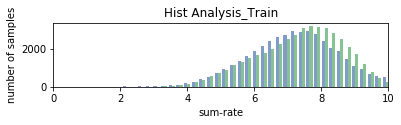

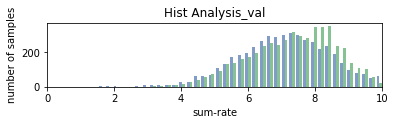

Train:
Sum-rate: IWF: 7.354, DNN: 7.342
Ratio: DNN: 99.845%

Val:
Sum-rate: IWF: 7.328, DNN: 7.275
Ratio: DNN: 99.270%



0

In [49]:

trainPred=model480240.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model480240.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
# ypred=model240.predict(Xtest)
D=12
M=2
N=2
K=3
# # test
# xtest=DABtoComplex(Xtest,D)
# ytest=DABtoComplex(Ytest,D)
# ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# # test
# nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
# IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 45000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 45000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

# plt.figure(1)
# # plt.subplot(311)
# # plt.title('CDF AnalysisTest')
# # CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
# plt.subplot(312)
# plt.title('CDF Analysis_Train')
# CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
# plt.subplot(313)
# plt.title('CDF Analysis_Val')
# CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
# plt.subplot(311)
# plt.title('Hist AnalysisTest')
# histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
# print('test:')
# performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 45000)
print('Val:')
performance(IWFSRVal, nnSRVal, 5000)

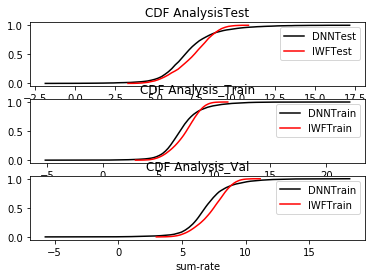

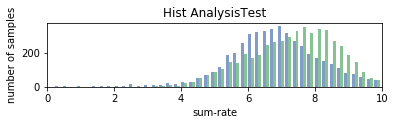

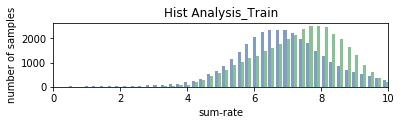

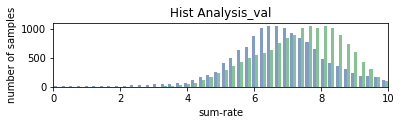

test:
Sum-rate: IWF: 7.326, DNN: 7.066
Ratio: DNN: 96.455%

Train:
Sum-rate: IWF: 7.342, DNN: 7.088
Ratio: DNN: 96.540%

Val:
Sum-rate: IWF: 7.372, DNN: 6.969
Ratio: DNN: 94.532%



0

In [25]:

trainPred=model240.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model240.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model240.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

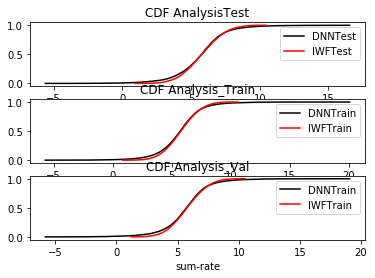

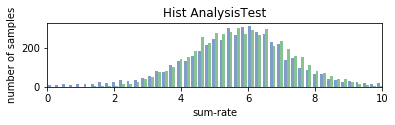

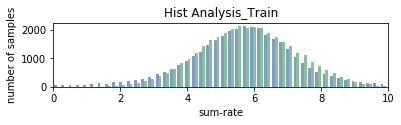

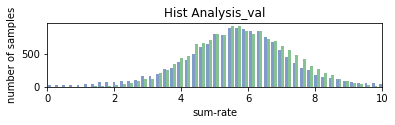

test:
Sum-rate: IWF: 5.798, DNN: 5.689
Ratio: DNN: 98.131%

Train:
Sum-rate: IWF: 5.786, DNN: 5.682
Ratio: DNN: 98.195%

Val:
Sum-rate: IWF: 5.791, DNN: 5.672
Ratio: DNN: 97.939%



0

In [27]:

trainPred=model480.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model480.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model480.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a34b9fb38>)

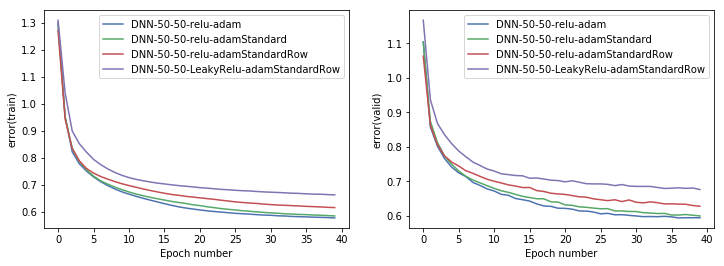

In [87]:
plot_whole(dictData)

In [13]:
def power(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    powerall=[]
    for i in range(samples):
        power=0
        H=np.reshape(xtest[i,:],[K,M,N])
#         print(y_pred[i,:])
        pnn=np.reshape(y_pred[i,:],[K,M,N])  
#         print(pnn)
        for j in range(K):
            power=power+np.trace(np.transpose(pnn[j,:,:]))
        powerall.append(np.real(power))
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
    return powerall

In [15]:
ypred=model480.predict(Xtest)
ypred=DABtoComplex(ypred,D)
power_nn=power(xtest,ypred,2,2,3,5000)

In [18]:
pnn=np.reshape(ypred[0,:],[K,M,N]) 

In [19]:
pnn

array([[[ 1.11710119-4.10327688e-03j, -0.33293271+5.75497448e-01j],
        [-0.33225808-5.75682282e-01j,  0.30185494+1.30315675e-06j]],

       [[ 0.60995996+1.19483820e-03j,  0.03578506+5.34889698e-01j],
        [ 0.03382522-5.37972689e-01j,  0.55619538-4.62369900e-03j]],

       [[ 3.06727934+2.39341706e-03j,  0.36294582-1.30250704e+00j],
        [ 0.36469075+1.30040467e+00j,  4.02302742+1.59051997e-05j]]])

In [57]:
power_nn

[10.640388429164886,
 9.800544023513794,
 9.98155364394188,
 10.110295921564102,
 10.214779198169708,
 9.608729988336563,
 9.725661158561707,
 9.820701122283936,
 9.918972790241241,
 10.004814237356186,
 9.794578552246094,
 10.100403606891632,
 10.211281478404999,
 10.218081623315811,
 9.855260670185089,
 10.017862617969513,
 10.008479237556458,
 10.022439301013947,
 9.932958126068115,
 9.939831674098969,
 9.811974942684174,
 9.831389844417572,
 9.907976686954498,
 9.94220182299614,
 9.860589265823364,
 9.749007821083069,
 9.905281364917755,
 10.080831706523895,
 9.868149876594543,
 9.730249464511871,
 9.952000796794891,
 9.91105717420578,
 9.999456107616425,
 10.009507030248642,
 9.803545027971268,
 9.938803553581238,
 10.051983714103699,
 9.8471040725708,
 10.081414878368378,
 9.936961054801941,
 9.72644716501236,
 9.879756152629852,
 9.885305345058441,
 10.313192129135132,
 9.974926948547363,
 10.28436815738678,
 10.026207029819489,
 10.078997135162354,
 9.893425971269608,
 9.868345

In [48]:
ytrain=DABtoComplex(y_train,D)
power_iwf=power(xtest,ytrain,2,2,3,1000)

In [58]:
ytest=DABtoComplex(Ytest,D)
power_iwf=power(xtest,ytest,2,2,3,5000)

In [59]:
power_iwf

[10.000000000000012,
 10.000000000000009,
 10.000000000000004,
 10.00000000000001,
 9.99999999999999,
 10.00000000000001,
 10.000000000000007,
 10.0,
 9.999999999999996,
 10.000000000000002,
 10.000000000000004,
 10.0,
 9.999999999999993,
 10.0,
 9.999999999999998,
 9.999999999999986,
 9.999999999999993,
 9.999999999999993,
 10.000000000000004,
 9.999999999999993,
 10.000000000000004,
 9.99999999999999,
 10.000000000000005,
 9.999999999999975,
 9.999999999999993,
 9.999999999999993,
 9.999999999999995,
 10.000000000000007,
 9.999999999999991,
 9.999999999999998,
 10.0,
 10.00000000000001,
 10.000000000000012,
 9.999999999999991,
 9.999999999999988,
 9.999999999999993,
 9.99999999999999,
 9.999999999999991,
 9.999999999999996,
 10.000000000000004,
 10.000000000000007,
 9.99999999999999,
 9.999999999999993,
 9.999999999999986,
 9.999999999999991,
 9.999999999999991,
 9.999999999999996,
 10.0,
 9.999999999999993,
 10.000000000000004,
 9.999999999999993,
 10.000000000000014,
 9.99999999999

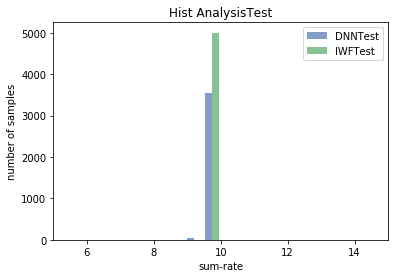

0

In [66]:
def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
#     plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),20)
    plt.hist(data, bins, alpha=0.7, label=label)
    plt.legend(loc='upper right')
    plt.xlim([5, 15])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
plt.figure(5)
plt.subplot(111)
plt.title('Hist AnalysisTest')
histPlot(power_nn,power_iwf, ['DNNTest', 'IWFTest'])
# plt.subplot(312)
# plt.title('Hist Analysis_Train')
# histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
# plt.subplot(313)
# plt.title('Hist Analysis_val')
# histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
# print('test:')
# performance(IWFsumRate, nnsumRate, 5000)
# print('Train:')
# performance(IWFSRTrain, nnSRTrain, 35000)
# print('Val:')
# performance(IWFSRVal, nnSRVal, 15000)

In [7]:
# example of training a final regression model

from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model50 = Sequential()
model50.add(Dense(50, input_dim=24, activation='relu'))
model50.add(Dense(50, activation='relu'))
model50.add(Dense(24, activation='linear'))
model50.summary()
model50.compile(loss='mse', optimizer='adam')
hist=model50.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN-50-50-relu-adam']=hist.history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                1250      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 24)                1224      
Total params: 5,024
Trainable params: 5,024
Non-trainable params: 0
_________________________________________________________________
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 3s 84us/step - loss: 1.3000 - val_loss: 1.1166
Epoch 2/100
35000/35000 [==============================] - 3s 77us/step - loss: 0.9502 - val_loss: 0.8680
Epoch 3/100
35000/35000 [==============================] - 2s 70us/step - loss: 0.8271 - val_loss: 0.8134
Epoch 4/100
35000/35000 [===========

In [11]:
# example of training a final regression model

from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model200 = Sequential()
model200.add(Dense(200, input_dim=24, activation='relu'))
model200.add(Dense(80, activation='relu'))
model200.add(Dense(24, activation='linear'))
model200.summary()
model200.compile(loss='mse', optimizer='adam')
hist=model200.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)

dictData['DNN-200-80-relu-adam']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               5000      
_________________________________________________________________
dense_8 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1944      
Total params: 23,024
Trainable params: 23,024
Non-trainable params: 0
_________________________________________________________________
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 3s 92us/step - loss: 1.0079 - val_loss: 0.7017
Epoch 2/100
35000/35000 [==============================] - 3s 91us/step - loss: 0.6398 - val_loss: 0.6149
Epoch 3/100
35000/35000 [==============================] - 3s 80us/step - loss: 0.5851 - val_loss: 0.5815
Epoch 4/100
35000/35000 [=========

In [45]:
# example of training a final regression model

from keras.layers import Input, Dense
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model = Sequential()
model.add(Dense(240, input_dim=24, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(24, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
history = LossHistory()
hist=model.fit(x_train, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)

dictData['DNN-240-200-relu-adam']=hist.history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 240)               6000      
_________________________________________________________________
dense_37 (Dense)             (None, 200)               48200     
_________________________________________________________________
dense_38 (Dense)             (None, 24)                4824      
Total params: 59,024
Trainable params: 59,024
Non-trainable params: 0
_________________________________________________________________
Train on 35000 samples, validate on 15000 samples
Epoch 1/100
35000/35000 [==============================] - 3s 99us/step - loss: 0.9282 - val_loss: 0.6581
Epoch 2/100
35000/35000 [==============================] - 3s 85us/step - loss: 0.6123 - val_loss: 0.5962
Epoch 3/100
35000/35000 [==============================] - 3s 94us/step - loss: 0.5626 - val_loss: 0.5564
Epoch 4/100
35000/35000 [=========

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2fbf1b70>)

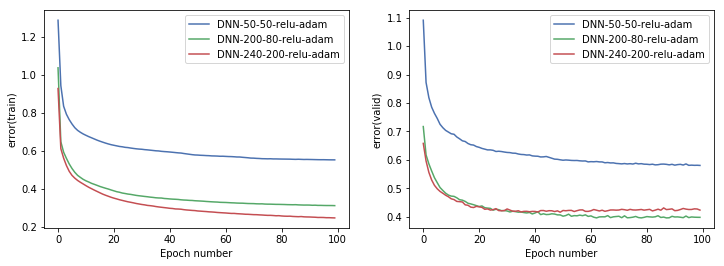

In [46]:

plot_whole(dictData)

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2db17ba8>)

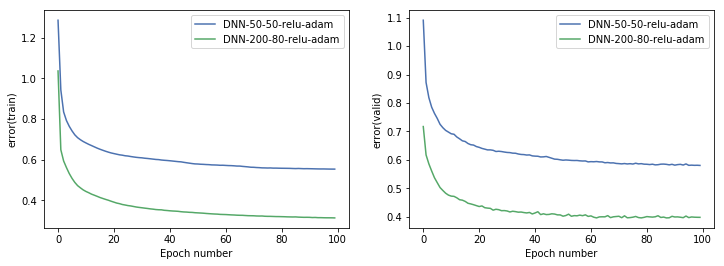

In [43]:

plot_whole(dictData)

In [46]:
import time
def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, n_hidden_4 = 40,binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights4(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_output)
    pred = multilayer_perceptron4(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X
# def obj_sum_rate(xtest, y_pred,M,N,K, samples):
#     # H ： sampels*12
#     sum_rate=[]
#     for i in range(samples):
#         rate_nn=0
#         H=np.reshape(xtest[i,:],[K,M,N])
#         pnn=np.reshape(y_pred[i,:],[K,M,N])      
#         for j in range(K):
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
#     return sum_rate



def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
    plt.xlim([0, 10])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model_location, save_name, n_input, n_output,dim, M, N, K,samples):
    ypred=test(Xtest, model_location, save_name+'%s'%('test'), n_input,n_output, binary=0)
    trainPred=test(x_train, model_location, save_name+"%s"%('train'), n_input,n_output, binary=0)
    valPred=test(x_val, model_location, save_name+"%s"%('val'), n_input,n_output, binary=0)
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
    

In [45]:
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==0:
                rate_nn = rate_nn+np.real(np.log2( \
                                                  np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),np.transpose(pnn[j,:,:])), np.transpose(H[j,:,:])))))
            else:
                pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(), pnn[j,:,:]), np.transpose(H[j,:,:]))) \
                                                  /np.linalg.det((np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),pnn[j-1,:,:]),np.transpose(H[j,:,:]))))))
                
        sum_rate.append(rate_nn)
    return sum_rate

Hidden 24-240-200-24 relu adam(mse) 100 epoch

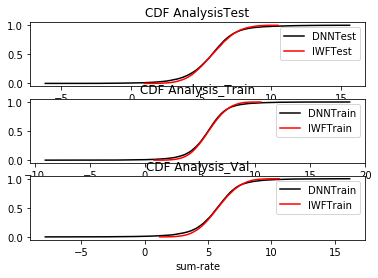

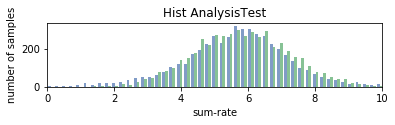

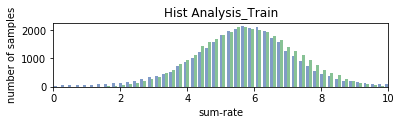

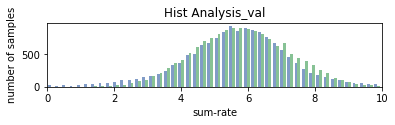

test:
Sum-rate: IWF: 5.798, DNN: 5.709
Ratio: DNN: 98.462%

Train:
Sum-rate: IWF: 5.788, DNN: 5.697
Ratio: DNN: 98.421%

Val:
Sum-rate: IWF: 5.788, DNN: 5.666
Ratio: DNN: 97.888%



0

In [51]:
trainPred=model.predict(x_train)
# model.save('my_model.h5')
# encoder_x_val=encoder.predict(x_val_standard)
valPred=model.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

Hidden 24-200-80-24 relu adam(mse) 100 epoch

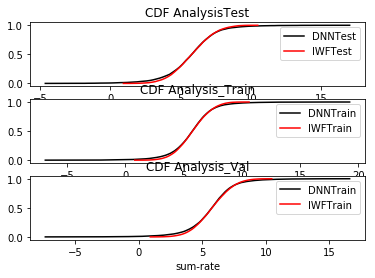

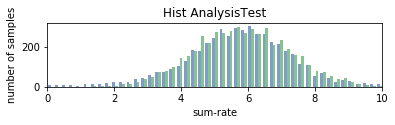

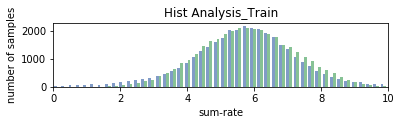

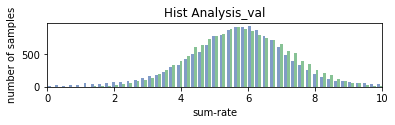

test:
Sum-rate: IWF: 5.798, DNN: 5.728
Ratio: DNN: 98.791%

Train:
Sum-rate: IWF: 5.789, DNN: 5.723
Ratio: DNN: 98.858%

Val:
Sum-rate: IWF: 5.785, DNN: 5.689
Ratio: DNN: 98.343%



0

In [12]:
trainPred=model200.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model200.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model200.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

Hidden 24-50-50-24 relu adam(mse) 100 epoch

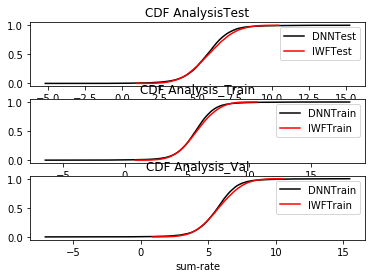

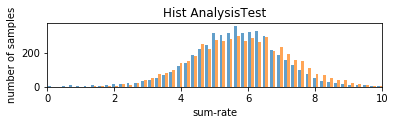

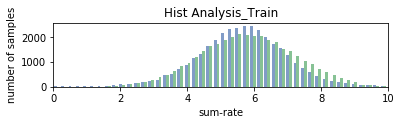

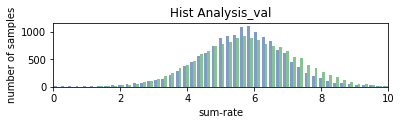

test:
Sum-rate: IWF: 5.798, DNN: 5.669
Ratio: DNN: 97.785%

Train:
Sum-rate: IWF: 5.789, DNN: 5.665
Ratio: DNN: 97.847%

Val:
Sum-rate: IWF: 5.785, DNN: 5.659
Ratio: DNN: 97.824%



0

In [10]:

trainPred=model50.predict(x_train)

# encoder_x_val=encoder.predict(x_val_standard)
valPred=model50.predict(x_val)

# encoder_x_test=encoder.predict(Xtest_standard)
ypred=model50.predict(Xtest)
D=12
M=2
N=2
K=3
# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)

# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

In [2]:
dictData.key()

NameError: name 'dictData' is not defined

In [ ]:

data = np.arange( 3 )
time = 23.5
position = [[23, 54], None]
d = dict( Train=time, POSITION=position )

np.savez( "tmp.npz", data=data, **d )

d = np.load( "tmp.npz" )
for key, val in sorted( d.items() ):
    print key, type(val), val  # note d.TIME is a 0-d array